#### Q1: What is Estimation Statistics? Explain point estimate and interval estimate.

Ans.

Estimation statistics is a branch of inferential statistics that focuses on estimating population parameters based on sample data. Instead of simply testing hypotheses, estimation statistics aim to provide numerical values (estimates) for unknown parameters of a population, along with measures of uncertainty.  
There are two main types of estimates used in estimation statistics:  
1. Point Estimate  
2. Interval Estimate

1.Point Estimate:
- A point estimate is a single value used to approximate an unknown population parameter. It is obtained from sample data and serves as the best guess for the true value of the parameter.
- Examples of Point Estimates:
  - The sample mean (𝑥 bar) is a point estimate of the population mean (𝜇).
  - The sample proportion (p cap) is a point estimate of the population proportion (p).
  - The sample standard deviation (s) is a point estimate of the population standard deviation (σ).
- Limitations:
  - A point estimate does not provide any information about its accuracy or reliability.
  - It can vary from sample to sample due to randomness in data collection.

2. Interval Estimate:
- An interval estimate provides a range of values within which the true population parameter is likely to fall, along with a confidence level that quantifies the uncertainty.
- Confidence Interval (CI): A confidence interval is the most common form of an interval estimate and is expressed as:  
Point Estimate +/- Margin of Error 0r ( Lower Bound, Upper Bound)
- Advantages of Interval Estimates:  
  - Provide a range of plausible values rather than a single estimate.
  - Give an indication of the precision and reliability of the estimate.

---

#### Q2. Write a Python function to estimate the population mean using a sample mean and standard deviation.

Ans.

In [1]:
import scipy.stats as stats
import numpy as np

In [2]:
def estimate_population_mean(sample, confidence=0.95):
    n = len(sample)
    sample_mean = np.mean(sample)
    sample_std = np.std(sample, ddof=1)

    t_value = stats.t.ppf((1 + confidence) / 2, df=n-1)

    margin_of_error = t_value * (sample_std / np.sqrt(n))
    
    lower_bound = sample_mean - margin_of_error
    upper_bound = sample_mean + margin_of_error

    return sample_mean, lower_bound, upper_bound

# Example Usage
sample_data = [45, 50, 55, 60, 65, 40, 50, 55, 53, 47]  # Sample dataset
mean, lower, upper = estimate_population_mean(sample_data, confidence=0.95)
print(f"Estimated Population Mean: {mean:.2f}")
print(f"95% Confidence Interval: ({lower:.2f}, {upper:.2f})")

Estimated Population Mean: 52.00
95% Confidence Interval: (46.79, 57.21)


---

#### Q3: What is Hypothesis testing? Why is it used? State the importance of Hypothesis testing.

Ans.

**Hypothesis testing:**  
- Hypothesis testing is a statistical method used to make decisions or inferences about a population based on sample data. It involves formulating an assumption (hypothesis) about a population parameter and then testing its validity using statistical techniques.
- The process typically involves:  
  1. Formulating a null hypothesis (𝐻0): A statement that there is no effect or no difference.  
  2. Formulating an alternative hypothesis (𝐻1 or Ha): A statement that there is an effect or a difference.  
  3. Collecting sample data and performing statistical tests.
  4. Comparing results to a significance level (α), often 0.05.  
  5. Deciding whether to reject or fail to reject the null hypothesis.

Hypothesis testing is used in various fields such as medicine, business, economics, and science to:  
- Make Data-Driven Decisions: Helps in decision-making based on statistical evidence rather than intuition.
- Validate Theories or Claims: Determines whether claims or assumptions about a population parameter are statistically significant.
- Compare Groups or Treatments: Assesses whether differences between groups are due to chance or a real effect.
- Detect Relationships Between Variables: Determines whether there is a significant correlation or causation between two factors.

Importance of Hypothesis Testing:
1. Provides Objectivity - Eliminates bias by relying on statistical evidence rather than assumptions.
2. Supports Scientific Research - Used to test new medical treatments, drug efficacy, and experimental results.
3. Reduces Decision-Making Errors - Helps avoid Type I errors (false positives) and Type II errors (false negatives).
4. Improves Business Strategies - Companies use it for A/B testing in marketing, product development, and customer behavior analysis.
5. Enhances Quality Control - Industries use it to check whether manufacturing processes meet standards.


---

#### Q4. Create a hypothesis that states whether the average weight of male college students is greater than the average weight of female college students.

Ans.

In [3]:
male_weights = [75, 80, 85, 78, 90, 88, 76, 95, 89, 84]
female_weights = [60, 62, 58, 65, 67, 64, 63, 59, 66, 61]

mean_male = np.mean(male_weights)
mean_female = np.mean(female_weights)

t_stat, p_value = stats.ttest_ind(male_weights, female_weights, alternative='greater')

alpha = 0.05

print(f"Mean weight of male students: {mean_male:.2f} kg")
print(f"Mean weight of female students: {mean_female:.2f} kg")
print(f"T-statistic: {t_stat:.4f}")
print(f"P-value: {p_value:.4f}")

if p_value < alpha:
    print("Reject the null hypothesis: Male students have a significantly higher average weight than female students.")
else:
    print("Fail to reject the null hypothesis: No significant difference in average weight between male and female students.")


Mean weight of male students: 84.00 kg
Mean weight of female students: 62.50 kg
T-statistic: 9.3244
P-value: 0.0000
Reject the null hypothesis: Male students have a significantly higher average weight than female students.


---

#### Q5. Write a Python script to conduct a hypothesis test on the difference between two population means, given a sample from each population.

Ans.

In [4]:
def hypothesis_test_two_means(sample1, sample2, alpha=0.05, alternative='two-sided'):
    mean1, mean2 = np.mean(sample1), np.mean(sample2)
    std1, std2 = np.std(sample1, ddof=1), np.std(sample2, ddof=1)  # Sample std dev
    n1, n2 = len(sample1), len(sample2)
    
    t_stat, p_value = stats.ttest_ind(sample1, sample2, equal_var=False, alternative=alternative)
    
    if p_value < alpha:
        decision = f"Reject the null hypothesis (p = {p_value:.4f}). There is a significant difference."
    else:
        decision = f"Fail to reject the null hypothesis (p = {p_value:.4f}). No significant difference."

    return t_stat, p_value, decision


In [5]:
sample_male = [72, 75, 78, 80, 85, 90, 88, 84, 79, 76]
sample_female = [60, 62, 65, 68, 70, 72, 71, 69, 67, 66]

t_stat, p_value, result = hypothesis_test_two_means(sample_male, sample_female, alpha=0.05, alternative='greater')

print(f"T-Statistic: {t_stat:.4f}")
print(f"P-Value: {p_value:.4f}")
print("Conclusion:", result)

T-Statistic: 6.1674
P-Value: 0.0000
Conclusion: Reject the null hypothesis (p = 0.0000). There is a significant difference.


---

#### Q6: What is a null and alternative hypothesis? Give some examples.

Ans.

1.Null Hypothesis (H0):
The null hypothesis is a statement that assumes no effect, no difference, or no relationship between variables. It represents the default assumption that any observed differences are due to chance or random variation.
  - It is what we test against.
  - We either reject or fail to reject 𝐻0.
  - We never "accept" 𝐻0; we only conclude whether we have enough evidence to reject it.

2.Alternative Hypothesis (Ha or H1):
The alternative hypothesis is a statement that contradicts the null hypothesis. It suggests that there is an effect, difference, or relationship in the population.
  - If there is enough statistical evidence, we reject H0 in favor of Ha.
  - It represents what the researcher is trying to prove.

---

#### Q7: Write down the steps involved in hypothesis testing.

Ans.

**Step 1: Define the Hypotheses**  
- Null Hypothesis (H0): Assumes no effect, no difference, or status quo.
- Alternative Hypothesis (Ha or H1): Represents the claim we are testing for (an effect, a difference, or a relationship).

**Step 2: Choose a Significance Level (𝛼)**  
- The significance level (α) represents the probability of rejecting H0 when it is actually true.
- Common choices:
  - 0.05 (5%) → Most commonly used
  - 0.01 (1%) → More stringent
  - 0.10 (10%) → Less stringent

**Step 3: Collect and Summarize the Data**
- Gather a random sample from the population.
- Compute sample statistics such as:
  - Mean (x bar)
  - Standard deviation (s)
  - Sample size (n)

**Step 4: Choose and Perform a Statistical Test**  
- The choice of test depends on:
  - Type of data (continuous, categorical, etc.)
  - Number of groups compared
  - Sample size
  - Distribution of data (normal or not)

**Step 5: Compute the Test Statistic and P-Value**
- The test statistic measures how far the sample statistic is from H0.  
- The p-value represents the probability of obtaining the observed results under H0.

**Step 6: Compare the P-Value with 𝛼**
- If p-value < 𝛼 -> Reject H0 (Significant evidence to support Ha).
- If p-value ≥ 𝛼 -> Fail to reject H0 (Not enough evidence to support Ha).

**Step 7: Interpret and Report the Results**
- Clearly state whether you reject or fail to reject H0.
- Provide the test statistic, p-value, and confidence interval.
- Explain the practical significance of the results.

---

#### Q8. Define p-value and explain its significance in hypothesis testing.

Ans.

The p-value (probability value) is a statistical measure that helps determine whether the observed data provides sufficient evidence to reject the null hypothesis (H0).
- It represents the probability of obtaining the observed results (or more extreme results) under the assumption that H0 is true.  
- The smaller the p-value, the stronger the evidence against H0.

---

#### Q9. Generate a Student's t-distribution plot using Python's matplotlib library, with the degrees of freedom parameter set to 10.

Ans.

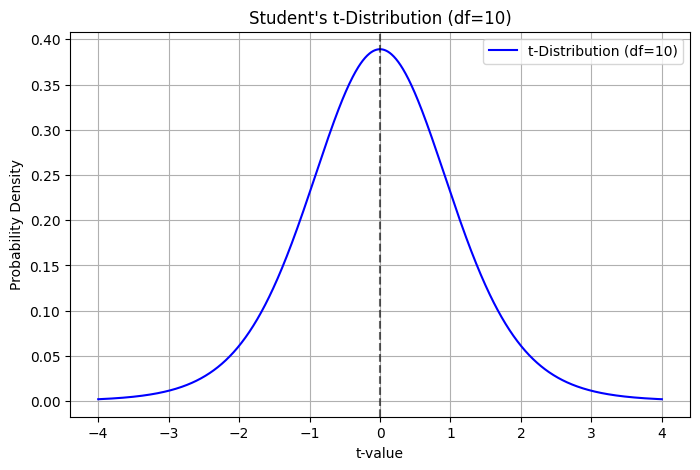

In [6]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

df = 10  
x = np.linspace(-4, 4, 1000) 
y = stats.t.pdf(x, df) 

plt.figure(figsize=(8, 5))
plt.plot(x, y, label=f"t-Distribution (df={df})", color="blue")
plt.axvline(0, linestyle="--", color="black", alpha=0.6)  
plt.xlabel("t-value")
plt.ylabel("Probability Density")
plt.title("Student's t-Distribution (df=10)")
plt.legend()
plt.grid(True)

---

#### Q10. Write a Python program to calculate the two-sample t-test for independent samples, given two random samples of equal size and a null hypothesis that the population means are equal.

Ans.

In [7]:
def two_sample_t_test(sample1, sample2, alpha=0.05):
    t_stat, p_value = stats.ttest_ind(sample1, sample2, equal_var=False)

    if p_value < alpha:
        decision = f"Reject the null hypothesis (p = {p_value:.4f}). The population means are significantly different."
    else:
        decision = f"Fail to reject the null hypothesis (p = {p_value:.4f}). No significant difference between population means."

    return t_stat, p_value, decision

sample1 = [56, 60, 62, 58, 59, 65, 61, 57, 64, 63]
sample2 = [75, 79, 80, 76, 82, 77, 81, 78, 74, 79]

t_stat, p_value, result = two_sample_t_test(sample1, sample2, alpha=0.05)

print(f"T-Statistic: {t_stat:.4f}")
print(f"P-Value: {p_value:.4f}")
print("Conclusion:", result)


T-Statistic: -13.9431
P-Value: 0.0000
Conclusion: Reject the null hypothesis (p = 0.0000). The population means are significantly different.


---

#### Q11: What is Student’s t distribution? When to use the t-Distribution.

Ans.

**Student’s t-Distribution:**
The Student’s t-distribution is a probability distribution used to estimate population parameters when the sample size is small, and the population standard deviation is unknown. It was first described by William Sealy Gosset under the pseudonym "Student."  
The t-distribution is similar to the normal distribution, but it has heavier tails. This means it accounts for more variability, which is especially useful when working with small sample sizes.

**When to Use the t-Distribution:**  
The t-distribution is typically used in the following situations:  
1. Small Sample Size (n < 30):
  - When the sample size is small, the sample mean may not approximate the population mean well, and the normal distribution is not a good fit.
  - For small samples, we use the t-distribution to account for this uncertainty.

2. Unknown Population Standard Deviation:
  - When the population standard deviation is unknown, and we must estimate it using the sample standard deviation, the t-distribution is appropriate.
  - This is common in real-world scenarios where population parameters are rarely known.

3. Hypothesis Testing:  
  - The t-distribution is used for hypothesis testing when the sample size is small, and we are testing whether the sample mean significantly differs from a known population mean (one-sample t-test) or comparing two sample means (two-sample t-test).
  - Example: Testing whether a new drug has a significantly different effect than an existing one with small sample data.

4. Confidence Intervals for Mean:  
  - When constructing confidence intervals for a population mean from a small sample, the t-distribution is used to adjust for the uncertainty in the estimate.

---

#### Q12: What is t-statistic? State the formula for t-statistic.

Ans.

The t-statistic (or t-value) is a value calculated from sample data during hypothesis testing. It helps determine whether to reject the null hypothesis (H0) by comparing the observed difference between the sample mean and the population mean to the standard error of the sample mean.  
It is used in Student’s t-test to assess if the difference between sample data and a population is statistically significant. The t-statistic is essential when:
- The sample size is small (n<30).
- The population standard deviation is unknown.

**Formula for t-Statistic:**
- For a one-sample t-test, the formula for the t-statistic is:  
 (Sample mean - Population mean) / (standard deviation / root of n ) 

---

#### Q13. A coffee shop owner wants to estimate the average daily revenue for their shop. They take a random sample of 50 days and find the sample mean revenue to be $500 with a standard deviation of $50. Estimate the population mean revenue with a 95% confidence interval.

Ans.

In [8]:
import scipy.stats as stats
import math

# Given data
sample_mean = 500
sample_std_dev = 50
sample_size = 50
confidence_level = 0.95

df = sample_size - 1

t_critical = stats.t.ppf(1 - 0.025, df)

standard_error = sample_std_dev / math.sqrt(sample_size)

margin_of_error = t_critical * standard_error
confidence_interval = (sample_mean - margin_of_error, sample_mean + margin_of_error)

print(f"t-Critical Value: {t_critical:.4f}")
print(f"Standard Error: {standard_error:.4f}")
print(f"Margin of Error: {margin_of_error:.4f}")
print(f"95% Confidence Interval: ({confidence_interval[0]:.2f}, {confidence_interval[1]:.2f})")


t-Critical Value: 2.0096
Standard Error: 7.0711
Margin of Error: 14.2098
95% Confidence Interval: (485.79, 514.21)


---

### Q14. A researcher hypothesizes that a new drug will decrease blood pressure by 10 mmHg. They conduct a clinical trial with 100 patients and find that the sample mean decrease in blood pressure is 8 mmHg with a standard deviation of 3 mmHg. Test the hypothesis with a significance level of 0.05.

Ans.

In [9]:
import scipy.stats as stats
import math

# Given data
sample_mean = 8  
hypothesized_mean = 10
sample_std_dev = 3
sample_size = 100 
alpha = 0.05

degree_of_freedom = sample_size - 1

t_stat = (sample_mean - hypothesized_mean) / (sample_std_dev / math.sqrt(sample_size))

p_value = stats.t.cdf(t_stat, df)

if p_value < alpha:
    result = f"Reject the null hypothesis (p = {p_value:.4f}). The drug has a significant effect on blood pressure."
else:
    result = f"Fail to reject the null hypothesis (p = {p_value:.4f}). The drug does not have a significant effect."

print(f"T-Statistic: {t_stat:.4f}")
print(f"P-Value: {p_value:.4f}")
print(result)


T-Statistic: -6.6667
P-Value: 0.0000
Reject the null hypothesis (p = 0.0000). The drug has a significant effect on blood pressure.


---

#### Q15. An electronics company produces a certain type of product with a mean weight of 5 pounds and a standard deviation of 0.5 pounds. A random sample of 25 products is taken, and the sample mean weight is found to be 4.8 pounds. Test the hypothesis that the true mean weight of the products is less than 5 pounds with a significance level of 0.01.

Ans.

In [10]:
import scipy.stats as stats
import math

# Given data
sample_mean = 4.8
population_mean = 5
population_std_dev = 0.5
sample_size = 25
alpha = 0.01

z_stat = (sample_mean - population_mean) / (population_std_dev / math.sqrt(sample_size))

p_value = stats.norm.cdf(z_stat)

if p_value < alpha:
    result = f"Reject the null hypothesis (p = {p_value:.4f}). The true mean weight is significantly less than 5 pounds."
else:
    result = f"Fail to reject the null hypothesis (p = {p_value:.4f}). No significant evidence that the true mean weight is less than 5 pounds."

print(f"Z-Statistic: {z_stat:.4f}")
print(f"P-Value: {p_value:.4f}")
print(result)


Z-Statistic: -2.0000
P-Value: 0.0228
Fail to reject the null hypothesis (p = 0.0228). No significant evidence that the true mean weight is less than 5 pounds.


---

#### Q16. Two groups of students are given different study materials to prepare for a test. The first group (n1 = 30) has a mean score of 80 with a standard deviation of 10, and the second group (n2 = 40) has a mean score of 75 with a standard deviation of 8. Test the hypothesis that the population means for the two groups are equal with a significance level of 0.01.

Ans.

In [11]:
# Given data for Group 1
mean_1, std_dev_1, n_1 = 80, 10, 30

# Given data for Group 2
mean_2, std_dev_2, n_2 = 75, 8, 40

alpha = 0.01

numerator = mean_1 - mean_2
denominator = math.sqrt((std_dev_1**2 / n_1) + (std_dev_2**2 / n_2))
t_stat = numerator / denominator

df = ((std_dev_1**2 / n_1 + std_dev_2**2 / n_2)**2) / ((std_dev_1**2 / n_1)**2 / (n_1 - 1) + (std_dev_2**2 / n_2)**2 / (n_2 - 1))

p_value = 2 * stats.t.cdf(-abs(t_stat), df)

if p_value < alpha:
    result = f"Reject the null hypothesis (p = {p_value:.4f}). The population means are significantly different."
else:
    result = f"Fail to reject the null hypothesis (p = {p_value:.4f}). No significant difference in population means."

print(f"T-Statistic: {t_stat:.4f}")
print(f"Degrees of Freedom: {df:.2f}")
print(f"P-Value: {p_value:.4f}")
print(result)


T-Statistic: 2.2511
Degrees of Freedom: 54.23
P-Value: 0.0285
Fail to reject the null hypothesis (p = 0.0285). No significant difference in population means.


---

#### Q17. A marketing company wants to estimate the average number of ads watched by viewers during a TV program. They take a random sample of 50 viewers and find that the sample mean is 4 with a standard deviation of 1.5. Estimate the population mean with a 99% confidence interval.

Ans.

In [12]:
# Given data
sample_mean = 4
sample_std_dev = 1.5
sample_size = 50
confidence_level = 0.99

df = sample_size - 1

t_critical = stats.t.ppf(1 - 0.005, df)

standard_error = sample_std_dev / math.sqrt(sample_size)

margin_of_error = t_critical * standard_error
confidence_interval = (sample_mean - margin_of_error, sample_mean + margin_of_error)

print(f"t-Critical Value: {t_critical:.4f}")
print(f"Standard Error: {standard_error:.4f}")
print(f"Margin of Error: {margin_of_error:.4f}")
print(f"99% Confidence Interval: ({confidence_interval[0]:.2f}, {confidence_interval[1]:.2f})")


t-Critical Value: 2.6800
Standard Error: 0.2121
Margin of Error: 0.5685
99% Confidence Interval: (3.43, 4.57)
